# Pump it Up: Data Mining the Water Table

### Can you predict which water pumps are faulty?

Using data from Taarifa and the Tanzanian Ministry of Water, we are trying to predict which pumps are functional, which need some repairs, and which don't work at all based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. 

A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

## Brief description of the data
### Features

* amount_tsh - Total static head (amount water available to waterpoint)
* date_recorded - The date the row was entered
* funder - Who funded the well
* gps_height - Altitude of the well
* installer - Organization that installed the well
* longitude - GPS coordinate
* latitude - GPS coordinate
* wpt_name - Name of the waterpoint if there is one
* num_private - no description
* basin - Geographic water basin
* subvillage - Geographic location
* region - Geographic location
* region_code - Geographic location (coded)
* district_code - Geographic location (coded)
* lga - Geographic location
* ward - Geographic location
* population - Population around the well
* public_meeting - True/False
* recorded_by - Group entering this row of data
* scheme_management - Who operates the waterpoint
* scheme_name - Who operates the waterpoint
* permit - If the waterpoint is permitted
* construction_year - Year the waterpoint was constructed
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed
* payment - What the water costs
* payment_type - What the water costs
* water_quality - The quality of the water
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint

### Labels

* **functional** - the waterpoint is operational and there are no repairs needed
* **functional needs repair** - the waterpoint is operational, but needs repairs
* **non functional** - the waterpoint is not operational

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)

print("Setup Complete")

Setup Complete


In [8]:
pylab.rcParams["figure.figsize"] = (14,8)

In [2]:
# Read the file into a variable my_data
X_train = pd.read_csv("4910797b-ee55-40a7-8668-10efd5c1b960.csv")
y_train = pd.read_csv("0bf8bc6e-30d0-4c50-956a-603fc693d966.csv")
X_test = pd.read_csv("702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv")

# Merge train X and y values
train_df = X_train.merge(y_train,how='outer',left_index=True, right_index=True)

# # For the preprocessing, we will combine train and test data
# X_train['train']=1
# X_test['train']=0
# combined = pd.concat([X_train, X_test])
# all_df=pd.merge(combined,y_train, left_index=True, right_index=True)

In [3]:
train_df.head()

,id_x,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id_y,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional


# 1. EDA

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 42 columns):
id_x                     59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

The dataset includes 74250 observations and 41 columns. 

The "status_group" column shows the label or target for each pump, the other 40 columns are features, 10 of which are numerical, the rest are categorical. 
First, let's explore the numerical columns.
## 1.1 Preliminary accuracy score (baseline)

Let's take a look at the target variable distribution in the train dataset and calculate the baseline for our further predictions.

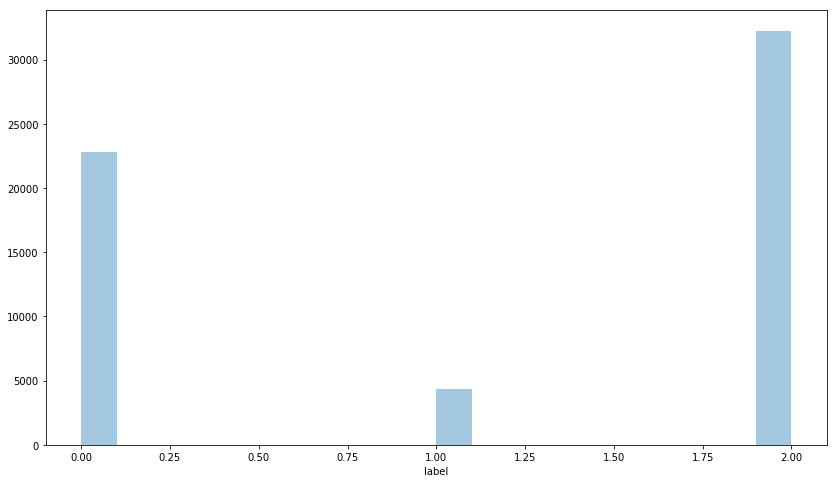

In [9]:
label_dict = {"functional":2,"functional needs repair":1,"non functional":0}
train_df["label"] = train_df["status_group"].map(label_dict)
sns.distplot(train_df["label"],kde=False)

In [7]:
majority_class = train_df['status_group'].mode()[0]
print("The most frequent label is", majority_class)

y_prelim_pred = np.full(shape=train_df['status_group'].shape, fill_value=majority_class)
accuracy_score(train_df['status_group'], y_prelim_pred)

The most frequent label is functional


0.543080808080808

It means that we can make a preliminary estimate of 54.31% chance of a random pump from this database to be functional. This number will be a baseline for the future model predictions.

**Side note**: Our target variable is discrete, so we will need a supervised learning **classification** algorithm for the label prediction.

**Machine Learning Classification Algorithms:**

* Ensemble Methods
* Generalized Linear Models (GLM)
* Naive Bayes - possible with multiple classes
* Nearest Neighbors
* Support Vector Machines (SVM)
* Decision Trees
* Discriminant Analysis
* XGboost

## 1.2 Numerical columns

In [11]:
# Select numerical columns
numerical_vars = [col for col in train_df.columns if 
                train_df[col].dtype in ['int64', 'float64']]

In [12]:
train_df[numerical_vars].describe()

,id_x,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,id_y,label
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475,37115.131768,1.158838
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547,21453.128371,0.949794
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000,18519.750000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000,37061.500000,2.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,55656.500000,2.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,74247.000000,2.000000


#### Notes for Data Cleaning & Preprocessing:

**TO DO**: combine Longtitude and latitude vars into a new one? (feature engineering)
https://stackoverflow.com/questions/53658056/how-to-combine-2-columns-of-a-dataframe-into-another

Text(0, 0.5, 'Number of pumps constructed')

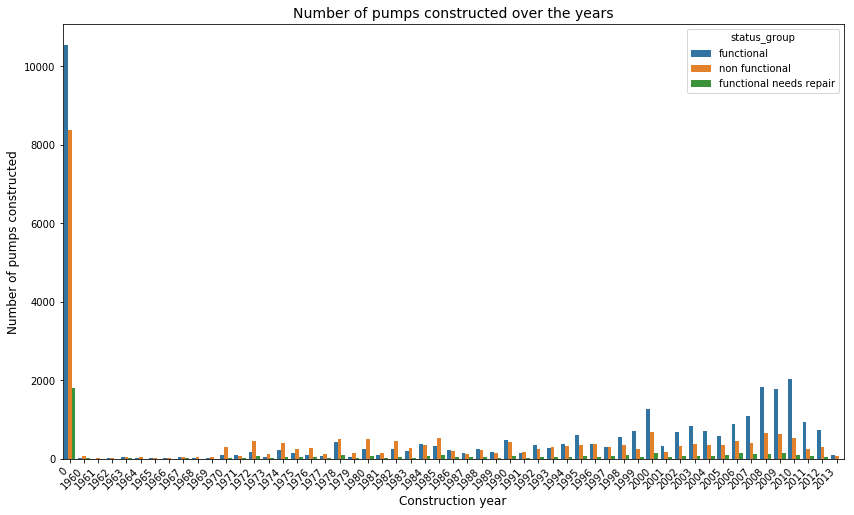

In [13]:
sns.countplot(x=train_df["construction_year"],hue=train_df["status_group"])
plt.xticks(rotation=45, 
    horizontalalignment='right')
plt.title("Number of pumps constructed over the years", fontsize=14)
plt.xlabel("Construction year", fontsize=12)
plt.ylabel("Number of pumps constructed", fontsize=12)

We can see that most pumps that were built 1985 are non functional, whereas the more recent pumps tend to be functional. It means that the "construction_year" feature could be very useful in our prediction model. The number of pumps that needs repair seems not very high and quite stable over the years. The rows with 0 construction year need to be checked.

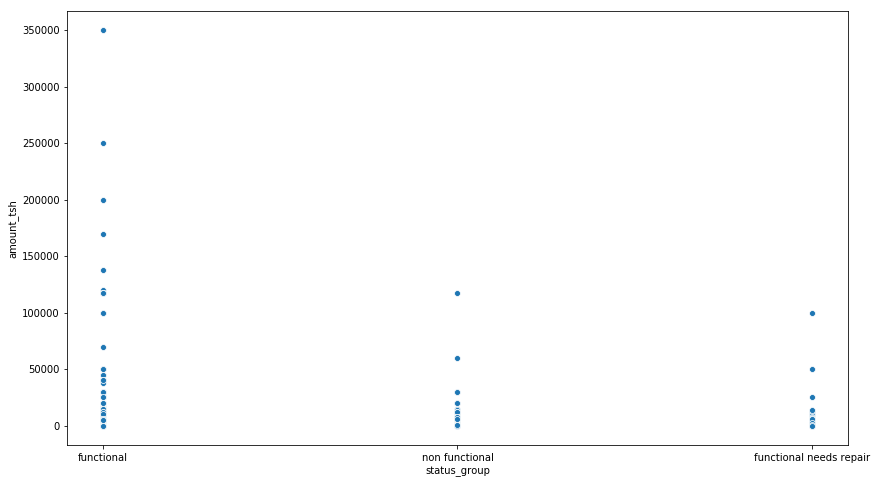

In [14]:
sns.scatterplot(y=train_df["amount_tsh"],x=train_df["status_group"])

If the "amount_tsh" > 150000 then most likely the pump is functional.

**TO DO**: create a binary var that will show 1 for functional pumps and 0 for all others (feature engineering).

### Distributions of numerical attributes



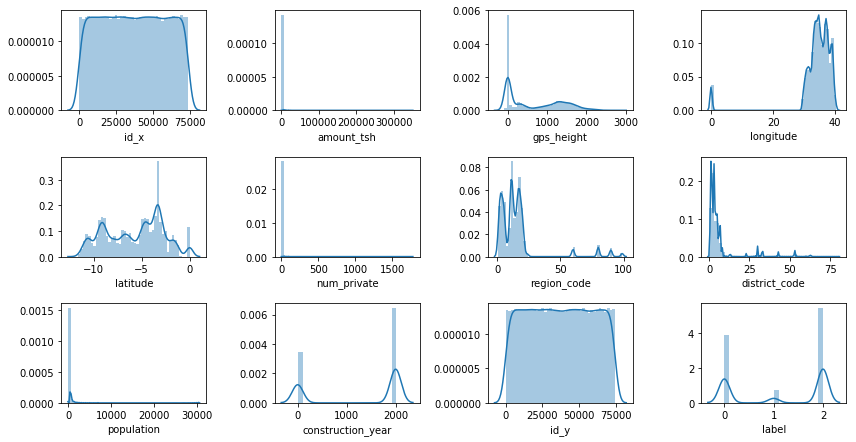

In [15]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_vars)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(train_df[numerical_vars].iloc[:,i].dropna())
    plt.xlabel(numerical_vars[i])

plt.tight_layout()
plt.show()

#### Notes for Data Cleaning & Preprocessing:
Uni-modal, skewed distributions could potentially be log transformed: 
* Longtitude
* District_code
* GPS_hight
* Region_code

depends on algorithm

Some numerical data looks like categorical. For example "construction_year" mostly have 2 values - 0 or 2000.
"amount_tsh" and "population" avriables have mostly 0 values.

### Finding Outliers
Visualisation of data may support the discovery of possible outliers within the data. 

Examples of how this can be done include:

* Within **univariate** analysis, for example through using box plots. Outliers are observations more than a multiple (1.5-3) of the IQR (inter-quartile range) beyond the upper or lower quartile. (If data is skewed, it may be helpful to transform them first to a more symmetric distribution shape)
* Within **bivariate** analysis, for example scatterplots. Outliers have y-values that are unusual in relation to other observations with similar x-values. Alternatively, plots of the residuals from fitted least square line of bivariate regression can also indicate outliers.

The consensus is that all outliers should be carefully examined:

Go back to original data to check for recording or transcription errors
If no such errors, look carefully for unusual features of the individual unit to explain difference. This may lead to new theory/discoveries
If data cannot be checked further, outlier is usually (often) dropped from the dataset.
The scatterplots of SalePrice against each numerical attribute is shown below, with the aim of employing method 2 above with bivariate analysis.

#### Univariate analysis - box plots for numerical attributes

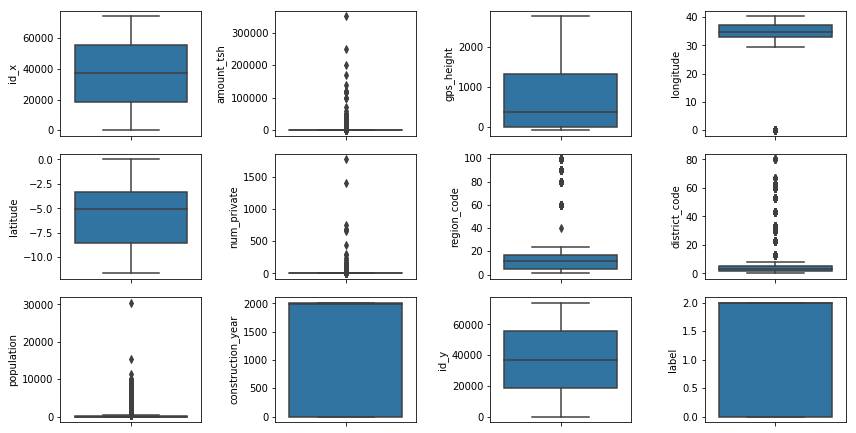

In [16]:
fig = plt.figure(figsize=(12, 18))

for i in range(len(numerical_vars)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=train_df[numerical_vars].iloc[:,i])

plt.tight_layout()
plt.show()

#### Notes for Data Cleaning & Preprocessing:
The outliers:
- Population > 200000.

#### Bivariate analysis - scatter plots for target versus numerical attributes

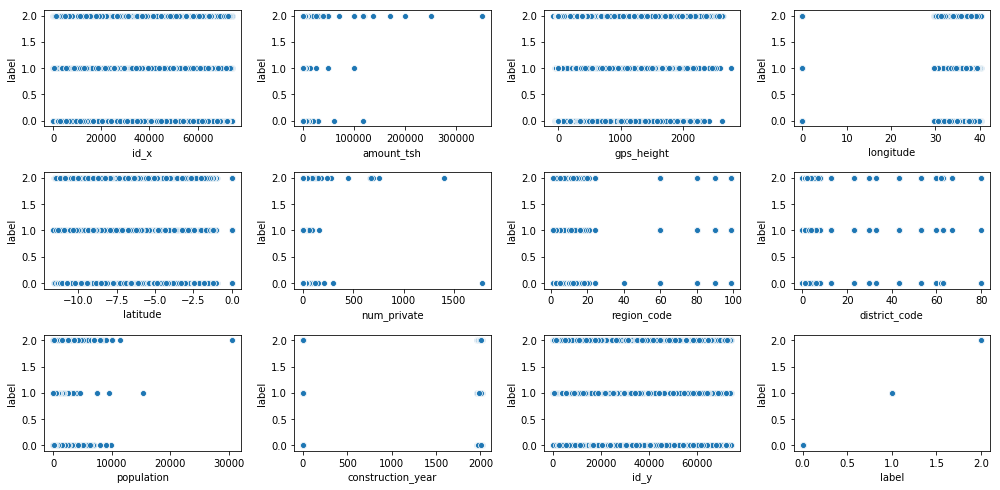

In [17]:
f = plt.figure(figsize=(14,20))

for i in range(len(numerical_vars)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(train_df[numerical_vars].iloc[:,i], train_df["label"])
    
plt.tight_layout()
plt.show()

#### Notes for Data Cleaning & Preprocessing
Based on a first viewing of the scatter plots against Label, there appears to be a few outliers to check on the:
* amount_tsh (> 200000) 
* population (> 13000)

### Assess correlations amongst attributes
The linear correlation between two columns of data is shown below. There are various correlation calculation methods, but the Pearson correlation is often used and is the default method. It may be useful to note that:

A combination of the correlation figure and a scatter plot can support the understanding of whether there is a non-linear correlation (i.e. depending on the data, this may result in a low value of linear correlation, but the variables may still be strongly correlated in a non-linear fashion)
Correlation values may be heavily influenced by single outliers!

Several authors have suggested that "to use linear regression for modelling, it is necessary to remove correlated variables to improve your model", and "it's a good practice to remove correlated variables during feature selection"


Below is a heatmap of the correlation of the numerical columns:

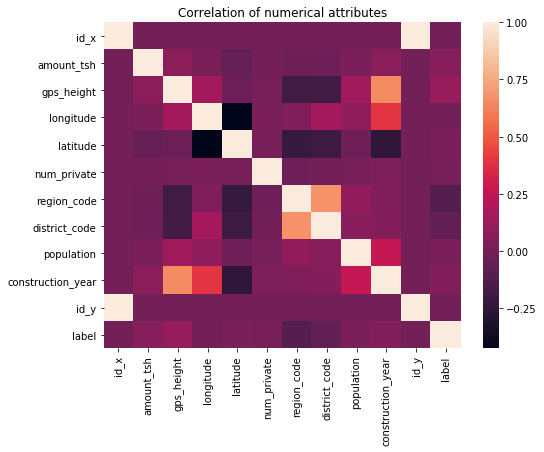

In [18]:
correlation = train_df.corr()

f, ax = plt.subplots(figsize=(8,6))
plt.title('Correlation of numerical attributes', size=12)
sns.heatmap(correlation)

The correlation between "district_code" and "region_code" is quite high. Consider removing one of them.

The correlation between "construction_year" and "gps_height" is also high, but these 2 variables don't have any obvious connection, so explore this correlation further to take a decision.

With reference to the target Label, the top correlated attributes are:

In [19]:
correlation['label'].sort_values(ascending=False)

label                1.000000
gps_height           0.114029
amount_tsh           0.053702
construction_year    0.043342
population           0.017759
latitude             0.014547
num_private          0.005021
id_y                -0.004049
id_x                -0.004049
longitude           -0.004366
district_code       -0.065687
region_code         -0.108640
Name: label, dtype: float64

The negative correlation to the target variable of the "region_code" is higher than that of the "district_code". Keep the variable with higher correlation to the target.

Linear correlation to the target is quite low for all variables but it might mean that there exists a non-linear correlation instead.

### Missing/null values in numerical columns


In [20]:
train_df[numerical_vars].isna().sum().sort_values(ascending=False)

label                0
id_y                 0
construction_year    0
population           0
district_code        0
region_code          0
num_private          0
latitude             0
longitude            0
gps_height           0
amount_tsh           0
id_x                 0
dtype: int64

##### Population

In [21]:
len(train_df.population[train_df.population == 0])

21381

21381 observations are missing population value. 

**TO DO**: A solution could be to convert it into categorical data by creating bins (feature engineering)

##### Region code

In [22]:
# Let's transform region code into categorical variable


## 1.3 Categorical columns

In [23]:
cat_vars = train_df.select_dtypes(include='object').columns
print(cat_vars)

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')


### Missing/null values in categorical columns

In [24]:
train_df[cat_vars].isna().sum().sort_values(ascending=False)

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
status_group                 0
extraction_type              0
wpt_name                     0
basin                        0
region                       0
lga                          0
ward                         0
recorded_by                  0
extraction_type_group        0
waterpoint_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
date_recorded                0
dtype: int64

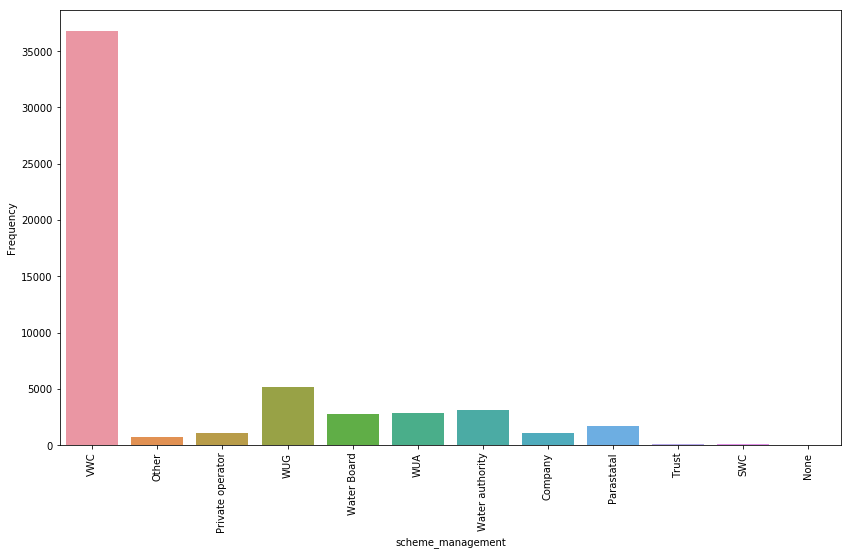

In [25]:
## Count of categories within Scheme_management attribute
sns.countplot(x='scheme_management', data=train_df)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

#### Notes for Data Cleaning & Preprocessing

Subvillage: 371 values missing, will be replaced with the mode of the values for the same Region_code.

The following columns will be one-hot encoded, leaving the max cardinality of 10, so we'll replace 0 values with "unknown":
* installer
* funder

The "scheme_management" column has only 11 categories, null values will be replaced with "unknown". After that, it will be one-hot encoded as well.

The following columns have True/False values, so we'll replace null values with "unknown":
* public_meeting
* permit

In [27]:
train_df.to_csv("train_df", index=False)
X_test.to_csv("X_test", index=False)